#  Laptop Price Prediction - Regression

<div style="text-align:center">
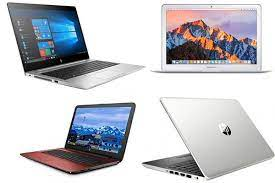
</div>

In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from termcolor import colored

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.width",600)
pd.set_option("display.max_rows",100)
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

## Load and EDA

In [369]:
df = pd.read_csv("laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.300,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.683
1,1,Apple,Ultrabook,13.300,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.523
2,2,HP,Notebook,15.600,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.000
3,3,Apple,Ultrabook,15.400,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.336
4,4,Apple,Ultrabook,13.300,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.808


In [370]:
df = df.drop("Unnamed: 0", axis=1)
df.sample(5)


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
993,Lenovo,Notebook,15.600,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.3kg,71874.720
542,HP,Ultrabook,13.300,IPS Panel Quad HD+ 3200x1800,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.34kg,61005.600
185,Dell,Notebook,17.300,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce 150MX,Windows 10,2.77kg,82530.720
1025,HP,Ultrabook,12.500,1366x768,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.26kg,83063.520
569,Lenovo,Notebook,14.000,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,2.02kg,52747.200


In [371]:
df_copy = df.copy()

In [372]:
def check_df(df, head=5, tail=5):
    print(" SHAPE ".center(70, '*'))
    print(f'Observations -------> {df.shape[0]}')
    print(f'Features     -------> {df.shape[1]}')
    print(f"Shape of dataset: {colored(df.shape, 'red')}")
    print(" TYPES OF FEATURES ".center(70, '*'))
    print(df.dtypes,"\n")
    print(" INFO ".center(70, "*"))
    print("\n",df.info(),"\n")
    print(' DUPLICATE VALUE ANALYSIS '.center(70, '*'))
    print("\n",df.duplicated().sum(),"\n")
    print(" MISSING VALUES ".center(70, "*"))
    print(df.isnull().sum())
    print(" DESCRIPTIVE STATISTICS ".center(70, "*"))
    print(df.describe().T)
check_df(df)

******************************* SHAPE ********************************
Observations -------> 1303
Features     -------> 11
Shape of dataset: (1303, 11)
************************* TYPES OF FEATURES **************************
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object 

******************************** INFO ********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   o

In [373]:
df.describe(exclude=np.number).T

,count,unique,top,freq
Company,1303,19,Dell,297
TypeName,1303,6,Notebook,727
ScreenResolution,1303,40,Full HD 1920x1080,507
Cpu,1303,118,Intel Core i5 7200U 2.5GHz,190
Ram,1303,9,8GB,619
Memory,1303,39,256GB SSD,412
Gpu,1303,110,Intel HD Graphics 620,281
OpSys,1303,9,Windows 10,1072
Weight,1303,179,2.2kg,121


In [374]:
df = df.drop_duplicates()

In [375]:
df.duplicated().sum()

0

In [376]:
## Thus we found number of unique values of all columns with this function 
def check_unique(df):

  dict = {}
  for i in list(df.columns):
    dict[i] = df[i].nunique()
  nunq = pd.DataFrame(dict,index=["Number of Unique"]).transpose().sort_values(by="Number of Unique",ascending=False)
  return nunq
check_unique(df)  



,Number of Unique
Price,791
Weight,179
Cpu,118
Gpu,110
ScreenResolution,40
Memory,39
Company,19
Inches,18
Ram,9
OpSys,9


## Feature Engineering and Data Visualization

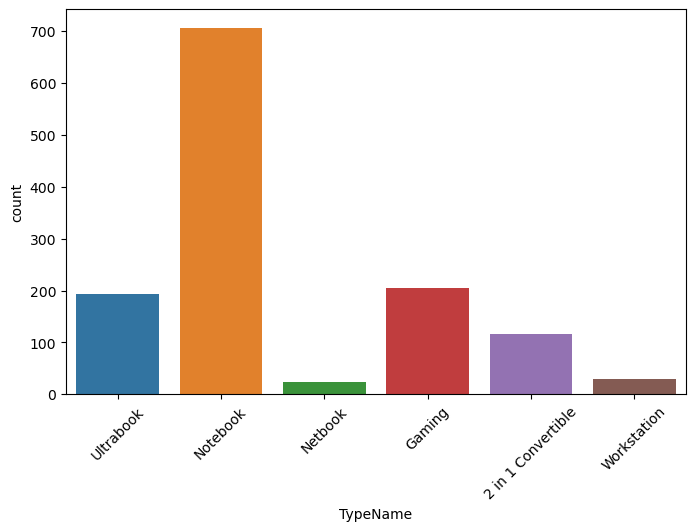

In [377]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
sns.countplot(x=df["TypeName"]);

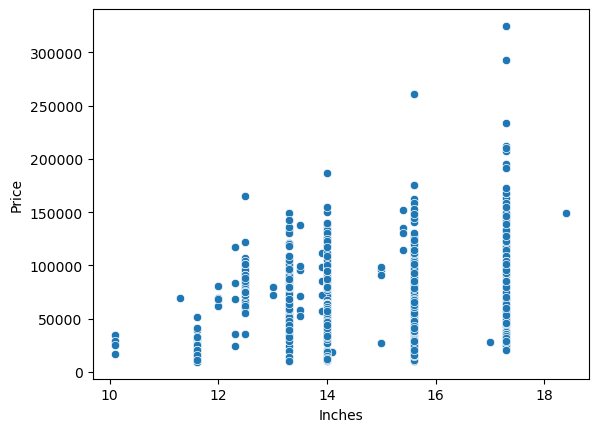

In [378]:
sns.scatterplot(df, x="Inches", y="Price");

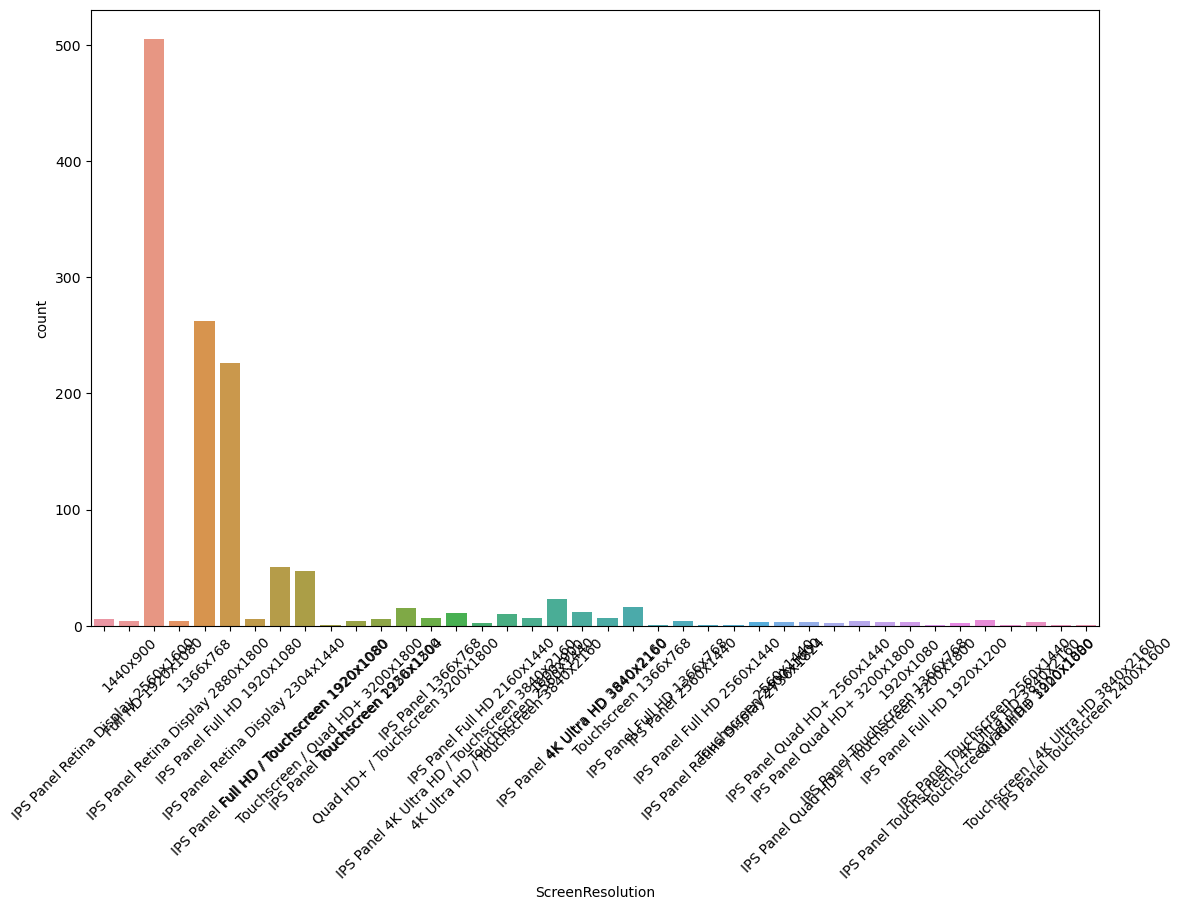

In [379]:
plt.figure(figsize=(13,8))
plt.xticks(rotation=45)
sns.countplot(x=df["ScreenResolution"]);

In [380]:
df["TouchScreen"] = df["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)

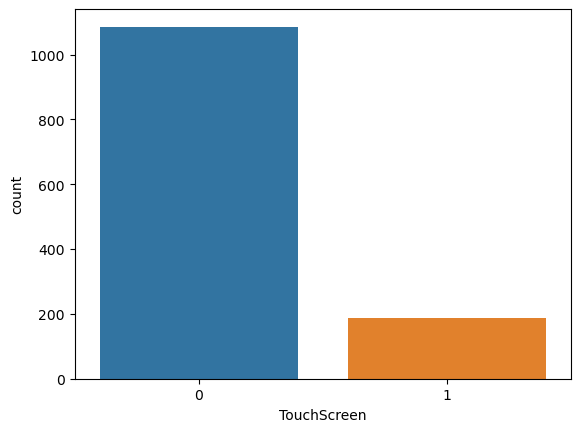

In [381]:
sns.countplot(x=df["TouchScreen"]);

In [382]:
df["HD_4K"] = df.ScreenResolution.apply(lambda x: 1 if "HD" in x or "4K" in x else 0)

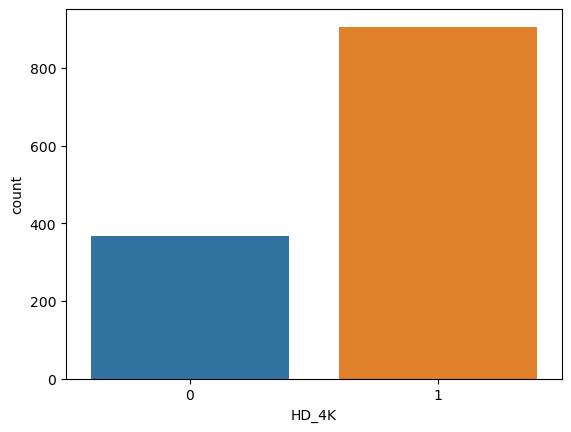

In [383]:
sns.countplot(x=df["HD_4K"]);

In [384]:
df["IPS"] = df.ScreenResolution.apply(lambda x: 1 if "IPS" in x else 0)

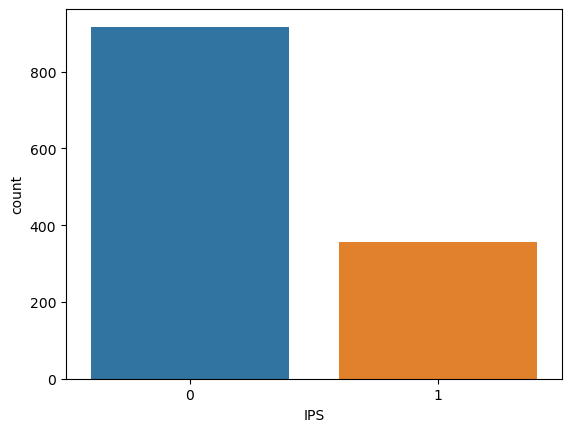

In [385]:
sns.countplot(x=df["IPS"]);

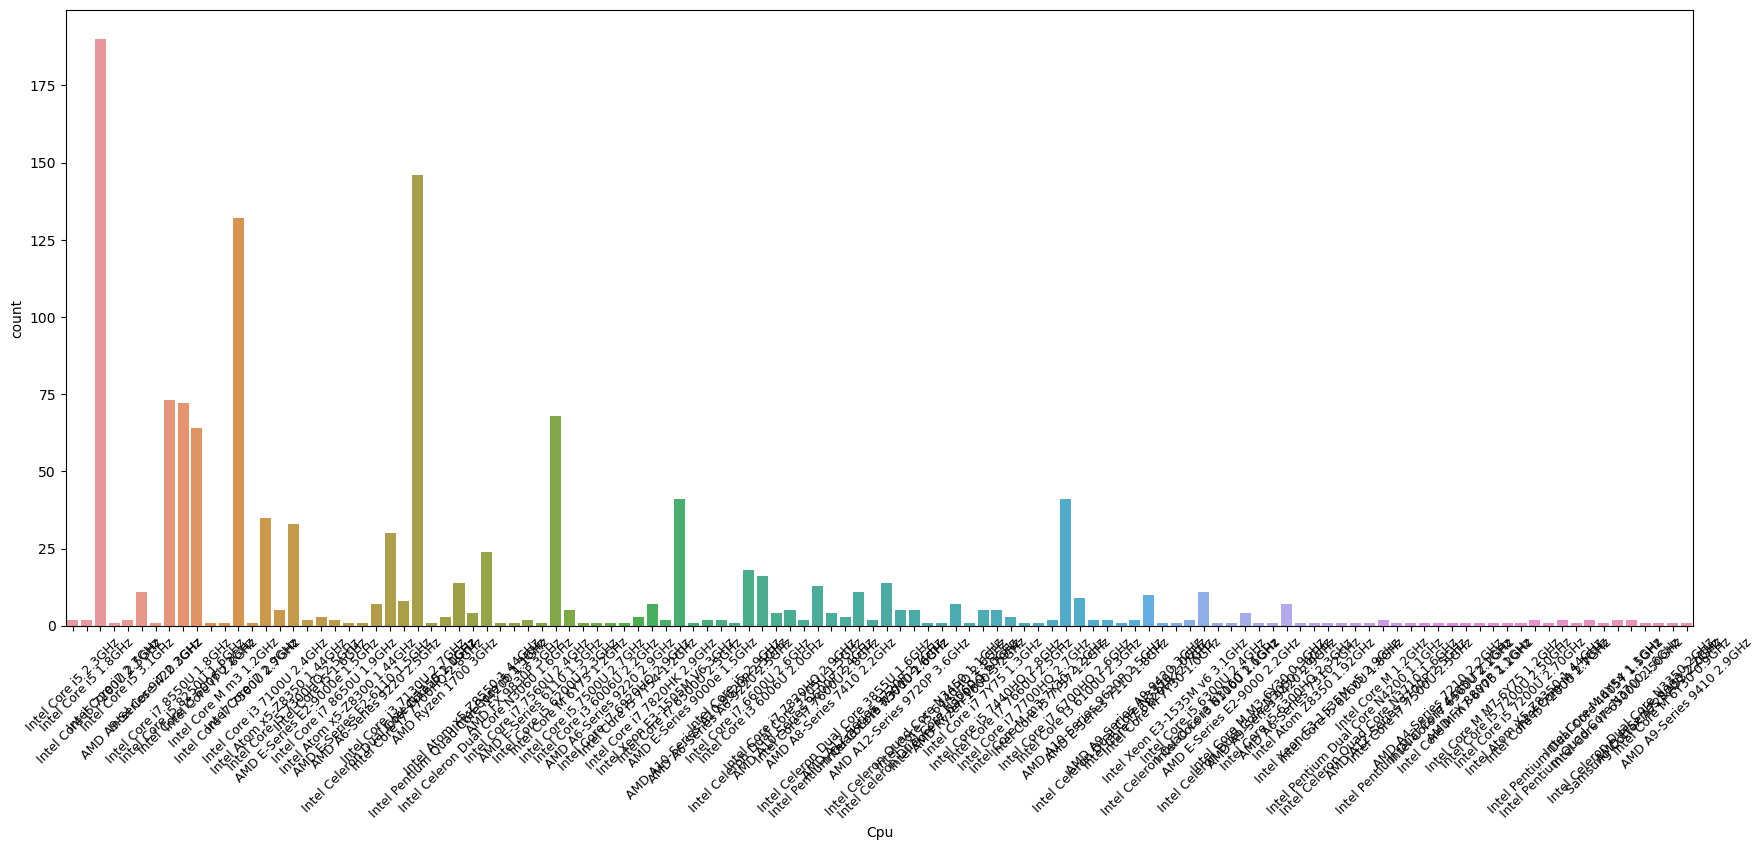

In [386]:
plt.figure(figsize=(21,8))
plt.xticks(rotation=45, size=9)
sns.countplot(x=df["Cpu"]);

In [387]:
df["CpuType"] = df.Cpu.apply(lambda x: "Intel" if "Intel" in x else("Samsung" if "Samsung" in x else "AMD"))


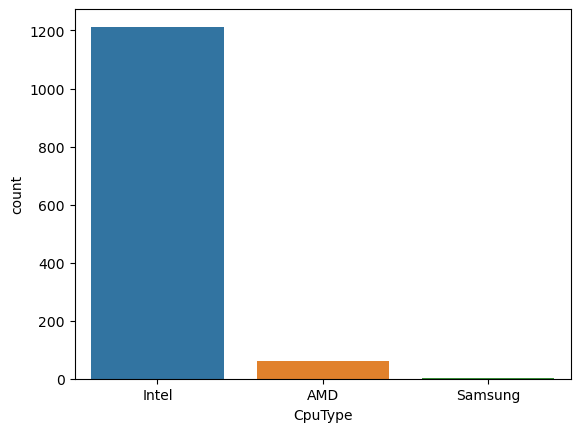

In [388]:
sns.countplot(x=df["CpuType"]);

In [389]:
df.to_pickle("df.pkl")

In [390]:
df = pd.read_pickle("df.pkl")

In [391]:
df["CpuFreq"] = df["Cpu"].str.extract(r'(\d+\.\d+GHz)')


In [392]:
df.loc[df["CpuFreq"].isnull(), "CpuFreq"] =df.loc[df["CpuFreq"].isnull(), "Cpu"].apply(lambda x: "2GHz" if "6006U" in x else "3GHz")

In [393]:
df["CpuFreq"] = df["CpuFreq"].str.replace("GHz","").astype(float)

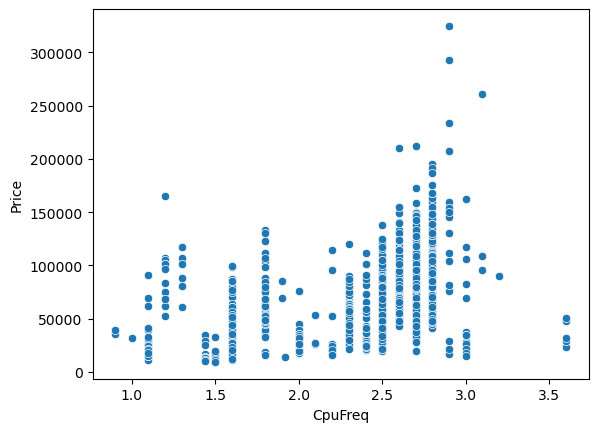

In [394]:
sns.scatterplot(df, x="CpuFreq", y="Price");

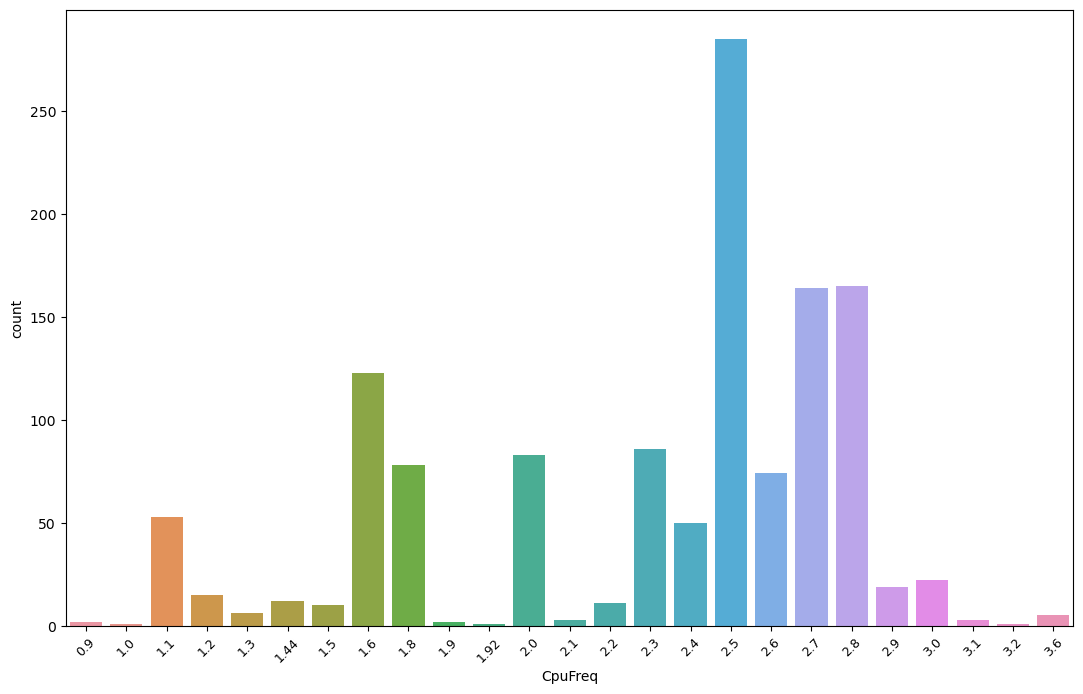

In [395]:
plt.figure(figsize=(13,8))
plt.xticks(rotation=45, size=9)
sns.countplot(x=df["CpuFreq"]);

In [396]:
df["Ram"] = df["Ram"].str.replace("GB","").astype(int)

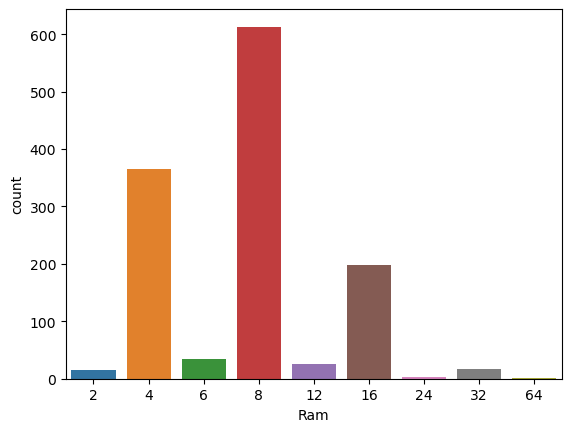

In [397]:
sns.countplot(x=df["Ram"]);

In [398]:
df["MemoryTypes"] = df.Memory.apply(lambda x: "SSD" if "SSD" in x else("HDD" if "HDD" in x else("Flash Storage" if "Flash Storage" in x else "Hybrid") ) )

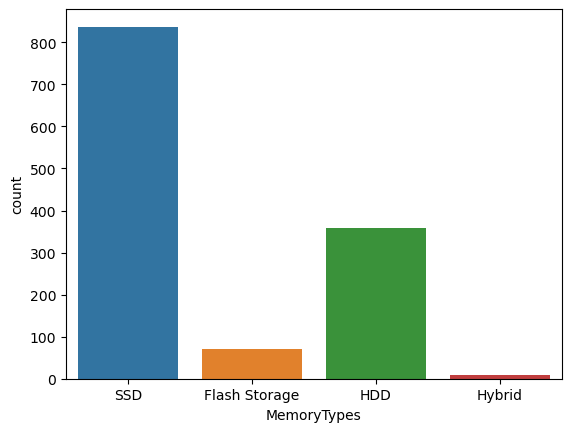

In [399]:
sns.countplot(x=df["MemoryTypes"]);

In [400]:
df["GpuType"] = df.Gpu.apply(lambda x: "AMD" if "AMD" in x else("Intel" if "Intel" in x else("Nvidia" if "Nvidia" in x else "ARM")))

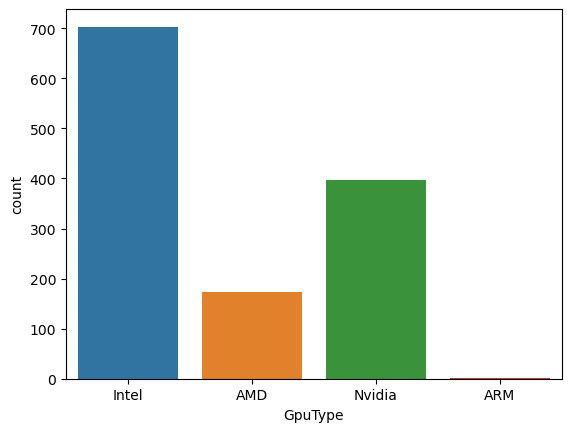

In [401]:
sns.countplot(x=df["GpuType"]);

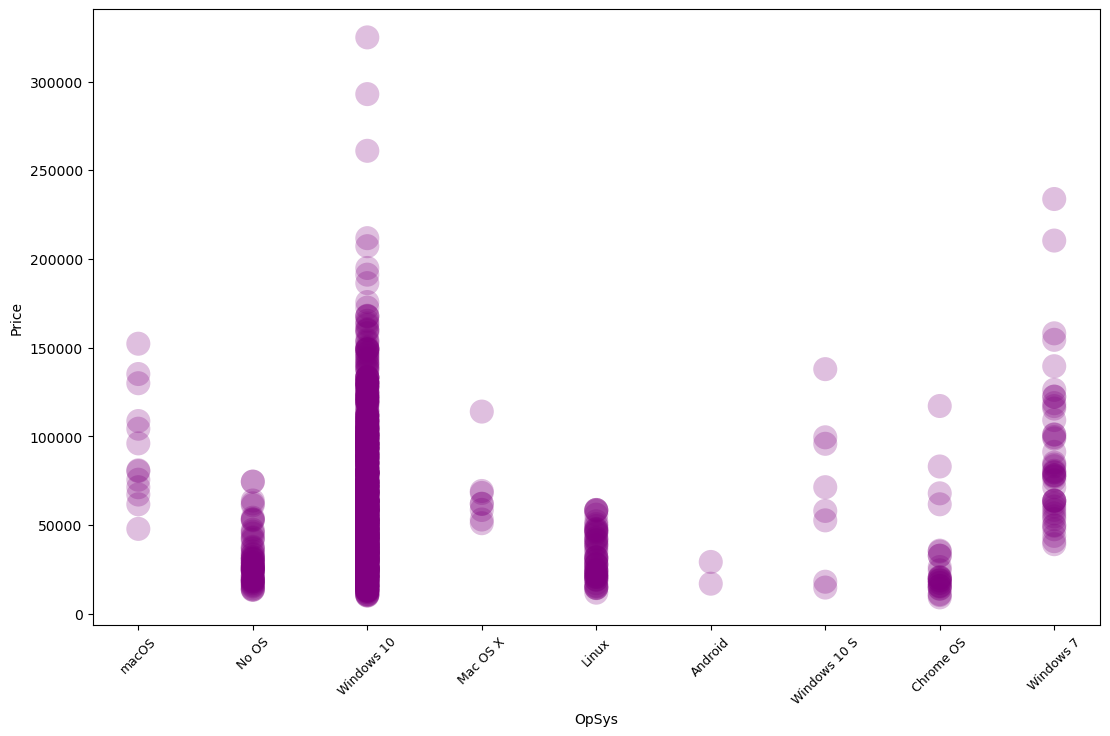

In [402]:

plt.figure(figsize=(13,8))
plt.xticks(rotation=45, size=9)
sns.scatterplot(df, x="OpSys", y="Price",s=300, alpha=0.25, edgecolor="none",c="purple");

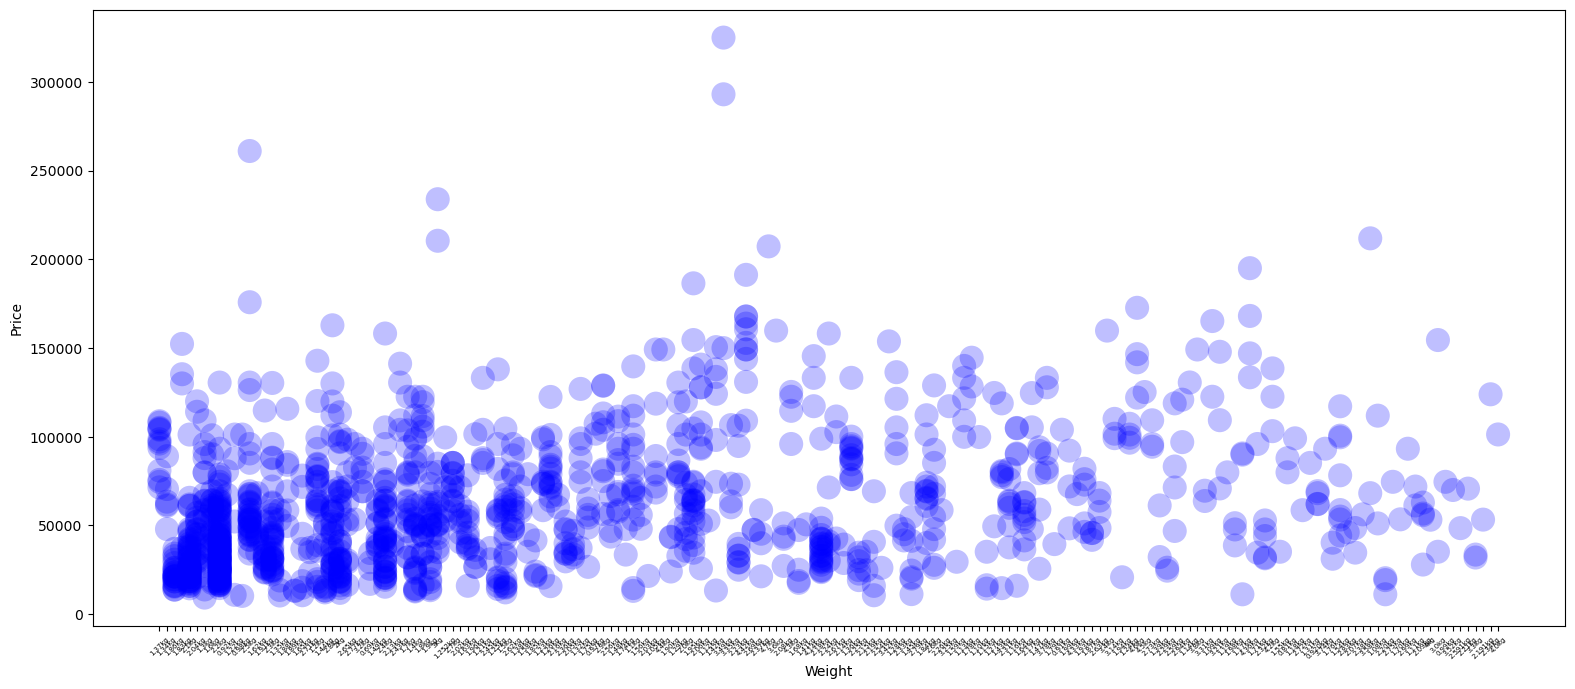

In [403]:
plt.figure(figsize=(19,8))
plt.xticks(rotation=45, size=5)
sns.scatterplot(df, x="Weight", y="Price",s=300, alpha=0.25, edgecolor="none",c="blue");

In [404]:

pixel = df["ScreenResolution"].str.extract(r"(\d+x\d+)")[0].str.split("x").tolist()



In [405]:
df["Resolution"] = list(map(lambda x: int(x[0]) * int(x[1]), pixel))


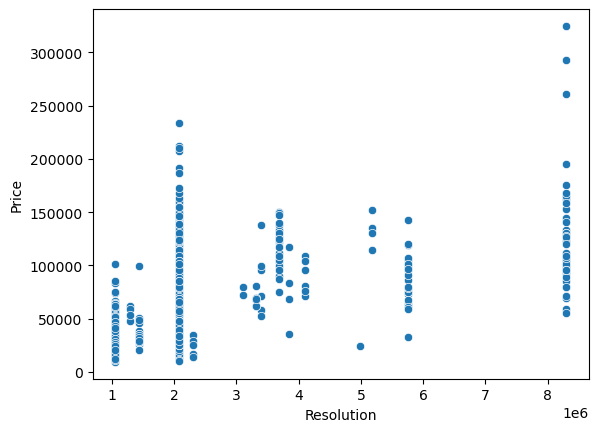

In [406]:
sns.scatterplot(x=df["Resolution"], y=df["Price"]);

In [407]:
df.to_pickle("dff.pkl")

In [408]:
df = pd.read_pickle("dff.pkl")

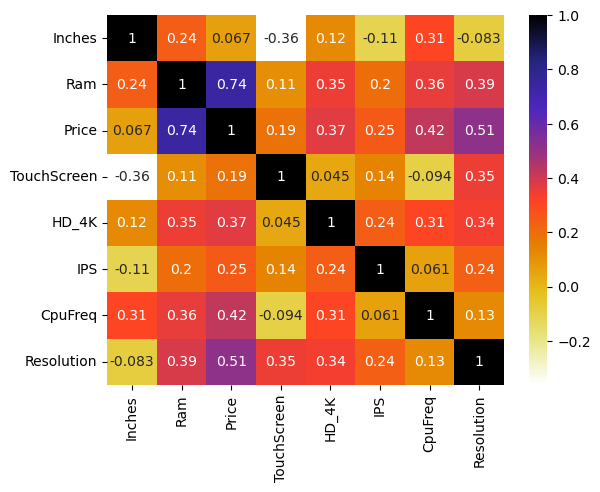

In [409]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=plt.cm.CMRmap_r);

In [410]:
abs(df.corr(numeric_only=True)["Price"]).sort_values(ascending=False)

Price         1.000
Ram           0.740
Resolution    0.511
CpuFreq       0.422
HD_4K         0.368
IPS           0.250
TouchScreen   0.189
Inches        0.067
Name: Price, dtype: float64

## AUTO ML

In [413]:
from pycaret.regression import*

In [418]:
setup(df, target="Price")

,Description,Value
0,Session id,2014
1,Target,Price
2,Target type,Regression
3,Original data shape,"(1274, 19)"
4,Transformed data shape,"(1274, 55)"
5,Transformed train set shape,"(891, 55)"
6,Transformed test set shape,"(383, 55)"
7,Numeric features,7
8,Categorical features,11
9,Preprocess,True


In [419]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,9668.2569,231097533.3163,14970.9415,0.8325,0.2157,0.1725,0.0940
gbr,Gradient Boosting Regressor,10110.6933,247952425.4670,15589.4571,0.8212,0.2311,0.1822,0.0480
xgboost,Extreme Gradient Boosting,10006.8224,271411333.6000,16169.5826,0.8053,0.2231,0.1702,0.0490
rf,Random Forest Regressor,10475.5693,296221863.0435,16927.6103,0.7858,0.2339,0.1809,0.1060
ridge,Ridge Regression,12464.5161,303437652.1721,17325.7092,0.7843,0.4073,0.2534,0.0280
lasso,Lasso Regression,12464.0015,304731079.5466,17364.1079,0.7826,0.3817,0.2513,0.0290
llar,Lasso Least Angle Regression,12475.6033,304915899.5463,17368.9459,0.7825,0.3824,0.2521,0.0290
lightgbm,Light Gradient Boosting Machine,10336.2870,313901195.3637,17483.5486,0.7789,0.2220,0.1701,0.0880
en,Elastic Net,13726.5670,383661928.3683,19440.3013,0.7269,0.3941,0.2802,0.0280
ada,AdaBoost Regressor,16222.0210,426458661.8257,20540.4431,0.6909,0.4084,0.4079,0.0460


In [420]:
best_model = create_model("et")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9182.2867,177180673.2289,13310.9231,0.8540,0.2195,0.1754
1,11054.3427,250057790.4695,15813.2157,0.8135,0.2476,0.2065
2,10519.2602,242295587.9356,15565.8468,0.8246,0.2239,0.1778
3,11629.0753,403164698.1322,20078.9616,0.6957,0.2479,0.1946
4,7547.6208,118164020.1464,10870.3275,0.8939,0.1559,0.1267
5,8887.0017,226551922.4650,15051.6419,0.8213,0.2065,0.1722
6,8017.9949,134602570.0842,11601.8348,0.9178,0.2026,0.1565
7,10304.6718,258819447.4041,16087.8665,0.8045,0.2157,0.1732
8,10469.0401,317959048.4689,17831.4062,0.7856,0.2156,0.1630


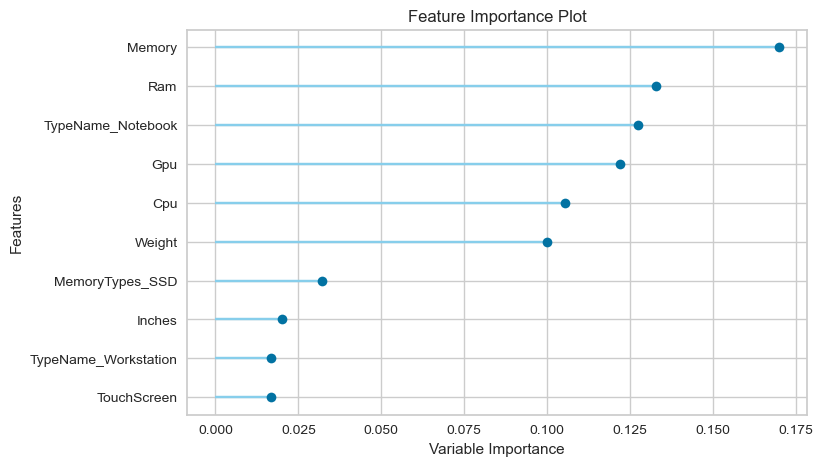

In [421]:
plot_model(best_model, plot="feature")

In [493]:
df = pd.read_pickle("dff.pkl")

## Outlier Analysis

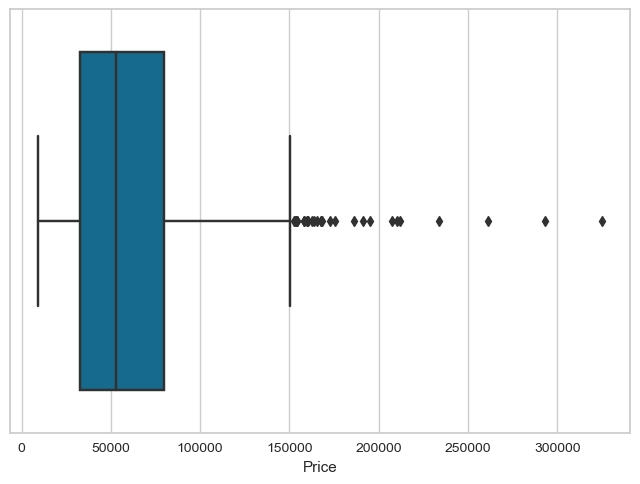

In [451]:
sns.boxplot(x=df["Price"]);

In [494]:
df = df[df["Price"] < df["Price"].quantile(q=0.97)]

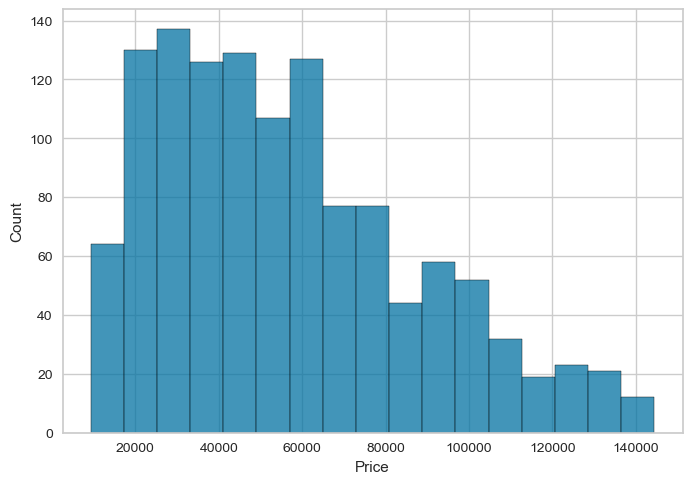

In [495]:
sns.histplot(x=df["Price"]);

## Data Preprocessing

In [496]:
X = df.drop("Price", axis=1)
y = df[["Price"]]

In [497]:
X = pd.get_dummies(X, drop_first=True)

In [498]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Modelling

In [499]:
def algo_test(X,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable
    
algo_test(X,y)

,R_Squared,RMSE,MAE
XGBRegressor,0.852,12022.722,8674.913
ElasticNet,0.836,12671.584,9536.765
Gradient Boosting,0.833,12795.972,9569.560
Lasso,0.830,12905.822,9568.569
Ridge,0.826,13029.241,9668.295
Decision Tree,0.726,16371.231,11641.038
Extra Tree,0.716,16675.504,11455.178
KNeighborsRegressor,0.602,19720.274,13512.612
Linear,-5604098323163237603046588416.000,2340610365057357312.000,649150526702583680.000


In [505]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [501]:
xgb=XGBRegressor()
model = xgb.fit(X_train,y_train)
prediction = model.predict(X_test)

In [502]:
print(f"RMSE...: {np.sqrt(mean_squared_error(prediction, y_test))}\nR2 SCORE...: {r2_score(prediction, y_test)}")

RMSE...: 12022.722251828718
R2 SCORE...: 0.8392432445169792


In [506]:
rf=RandomForestRegressor()
model_rf = rf.fit(X_train,y_train)
prediction_rf = model_rf.predict(X_test)

In [507]:
print(f"RMSE...: {np.sqrt(mean_squared_error(prediction_rf, y_test))}\nR2 SCORE...: {r2_score(prediction_rf, y_test)}")

RMSE...: 12349.264319972932
R2 SCORE...: 0.8042369753399533


## Hyperparameter Tuning with GridSearchCV

In [508]:
from sklearn.model_selection import GridSearchCV

In [509]:
parameters = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=parameters, cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Print the best parameters and highest R2 score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best R2 Score: {grid_search.best_score_}")

# Use the best parameters to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the model
print(f"RMSE...: {np.sqrt(mean_squared_error(predictions, y_test))}")
print(f"R2 SCORE...: {r2_score(predictions, y_test)}")

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.7}
Best R2 Score: 0.8225065462046702
RMSE...: 11721.796471672045
R2 SCORE...: 0.8432822719952303


In [511]:

rf = RandomForestRegressor(random_state=42)

parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rf, param_grid=parameters, cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Print the best parameters and highest R2 score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best R2 Score: {grid_search.best_score_}")

# Use the best parameters to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the model
print(f"RMSE...: {np.sqrt(mean_squared_error(y_test, predictions))}")
print(f"R2 SCORE...: {r2_score(y_test, predictions)}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R2 Score: 0.8047319820706044
RMSE...: 12237.609326861773
R2 SCORE...: 0.8468063838505385


In [512]:
from joblib import dump, load
dump(best_model, "laptop_price_pred_rf.joblib")

['laptop_price_pred_rf.joblib']

In [513]:
model = load("laptop_price_pred_rf.joblib")

In [515]:
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred

,0
0,64797.737
1,102399.425
2,32793.545
3,71294.261
4,29497.179
...,...
242,23738.925
243,72328.047
244,68701.393
245,75695.352
